###Mistakes I've made with (S)ARIMA models and Timeseries
1. What is a (S)ARIMA Model
2. Application and prediction of SARIMA
3. Predicting the future
4. Questions I've been asked about my model

####What the hell is a (S)ARIMA Model
* ARIMA = Generalized case of ARMA model, Autoregressive (AR), Moving Average (MA) model
    * I = Integrated = Differencing step, Y2 - Y1
    * Autoregressive Integrated Moving Average Model
* Used when data isn't stationary, aka there is some seasonality to the data (ex. weekly cycles)
    * This is our ultimate goal
* ARIMA(p,d,q)
    * p = Order of the Autoregressive
    * d = Degree of differencing
    * q = Order of the Moving Average Model
* SARIMA - Seasonal ARIMA(p,d,q)(P,D,Q)m - under active developement
    * p = Order of the Autoregressive
    * d = Degree of differencing
    * q = Order of the Moving Average Model
    * m = Number of periods in each season
    * P = Order of the Autoregressive - Seasonal part
    * D = Degree of differencing - Seasonal part
    * Q = Order of the Moving Average Model - Seasonal part
* ARIMA (1,0,0) is AR(1), ARIMA(0,1,0) is I(1), and ARIMA(0,0,1) is MA(1).
* In identifying a seasonal model, the first step is to determine whether or not a seasonal difference is needed, in addition to or perhaps instead of a non-seasonal difference.

### Application and prediction of SARIMA

#####Steps
1. Plot data
2. Plot predictions
3. Plot resids
4. Check ACF, PACF of resids
5. Adjust parameters of model
6. Rinse and repeat steps 4 and 5 till you achieve stationary data, you'll know you have white noise data through acf/pacf

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [124]:
df = pd.read_csv('broadway_spring_by_day.csv', header=None)
df.columns = ['date', 'num']
# df.head()
print len(df)
model = sm.tsa.ARIMA(df['num'].values, order=(0,0,1)).fit()

365


#####1 .What does our taxi data look like?

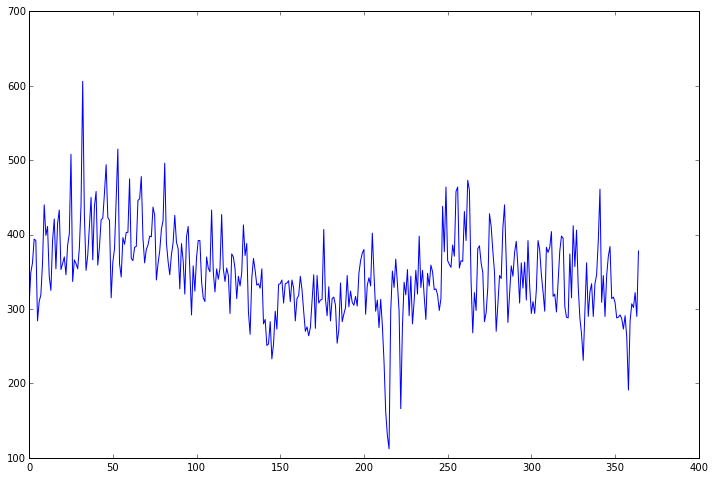

In [87]:
plt.figure(figsize=(12,8))
plt.plot(df['num'])

#####2. What do the predictions look like?

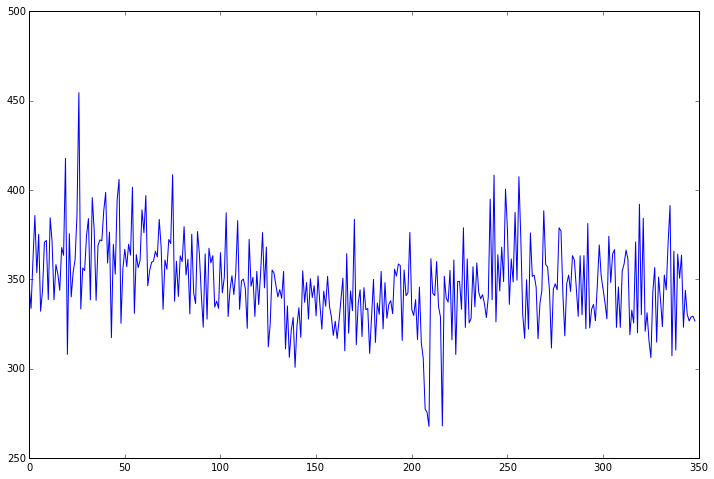

In [113]:
plt.figure(figsize=(12,8))
plt.plot(model.predict(7,355))

#####3. Cool lets check our residuals

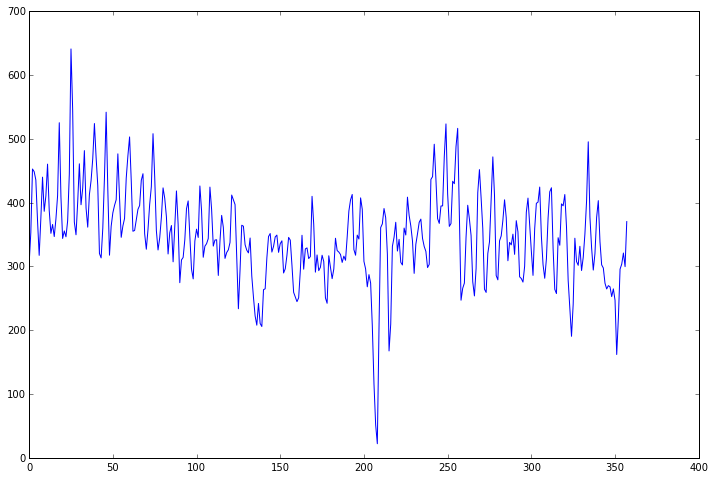

In [89]:
resid = ((df['num'].values)[7:365] - model.predict(7,364))
plt.figure(figsize=(12,8))
plt.plot(resid)

#####4 .Doesn't look great, but lets check the PACF and ACF

In [80]:
def acf_pacf(ts, lags):
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(ts, lags=lags, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(ts, lags=lags, ax=ax2)

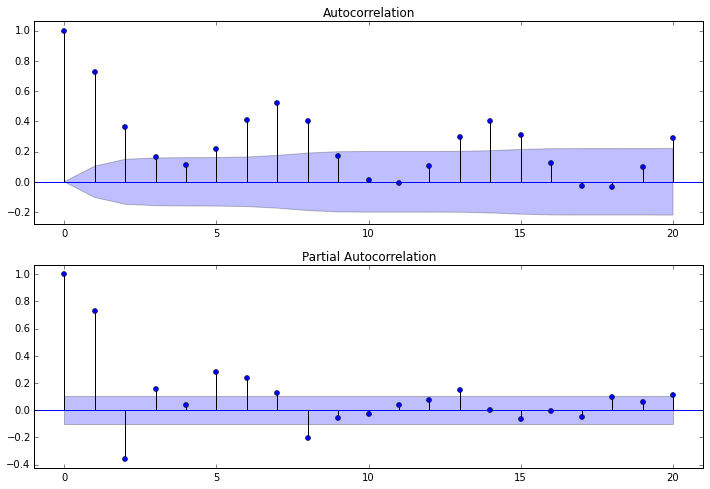

In [90]:
acf_pacf(resid, 20)
# print model.summary()

#####Predicting the future
Bursting bubble: didn't work out great

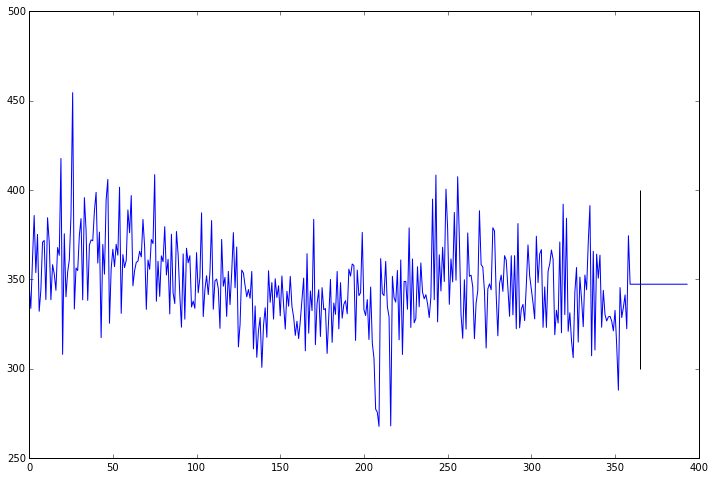

In [115]:
plt.figure(figsize=(12,8))
plt.vlines(365, 300, 400)
plt.plot(model.predict(7,400))

Resources

http://people.duke.edu/~rnau/411arim3.htm

http://people.duke.edu/~rnau/411arim3.htm